<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Normal_Distribution_Test_and_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

68.2 centerd around green area. Outliers distributed at red area or futher.

In some business domain first standard dev is outlier in some domains it is the 3rd standard deviation

Not all data i practice is normal, Nonetheless some statistical tests need data to be normally distributed.

Data can follow powerlaw thats not normal, How to apply statistical tests on it.

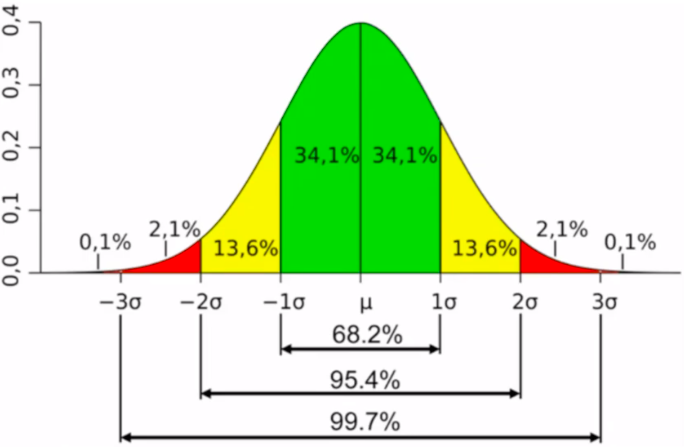

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
marketing_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv")

In [3]:
marketing_df.head()


,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


No Nulls in dataset

In [4]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

Always check the mean and median, If the mean and median is almost same then the distributon could be normal. But beaware this could not be the case every time. Hence plot the univaariate distribution plot to confirm

In [5]:
marketing_df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


As we can see that the data is almost normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


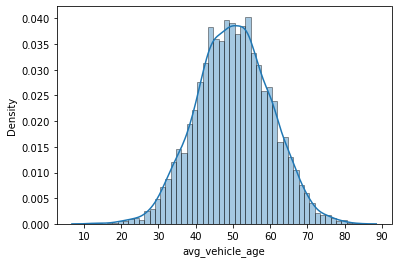

In [9]:
sns.distplot(marketing_df["avg_vehicle_age"], hist=True, hist_kws=dict(ec="k"))

Almost following the straight line signifies it is a normal distribution

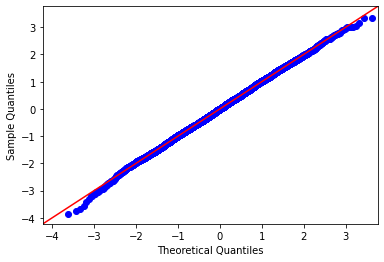

In [11]:
plot=sm.qqplot(marketing_df["avg_vehicle_age"], line="45", fit=True)

Box plot can also be sued to visualize whether distribution is sewed or not. We can clearly see that there is no skewness here

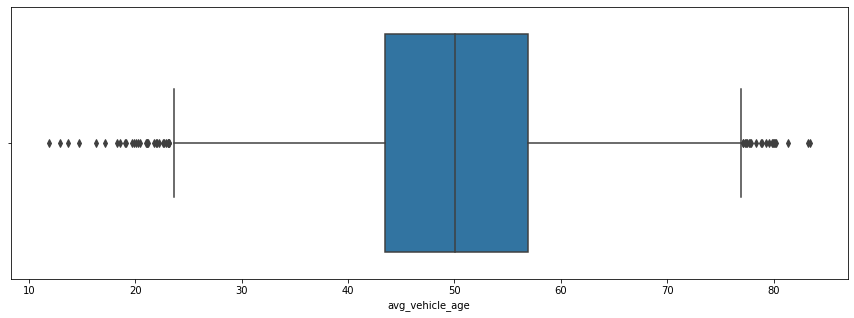

In [12]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="avg_vehicle_age", data=marketing_df)

null hypothesis - data came form normal distribution

Alternate hypothesis - data unlikely from normal distribution

In [13]:
chi2, p = stats.normaltest(marketing_df["avg_vehicle_age"])

Null hypothesis is true

In [14]:
print(chi2, p)

1.044505545511602 0.5931827357362212


Anderson darling test is sued to test whether data came from specific distribution, It could be log normal, powerlaw also

Null hypothesis - Sample drawn follows chosen distribution that is normal

Alternate hypothesis - Sample drawn is from other distribution

At 98% significnce level is 0.787

In [15]:
stats.anderson(marketing_df["avg_vehicle_age"], dist="norm")

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))